In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import wave
from pydub import AudioSegment
import scipy
from scipy.io import wavfile #audio i/o
from IPython.display import Audio #listening to audio
import thinkdsp
import thinkstats2
%matplotlib inline

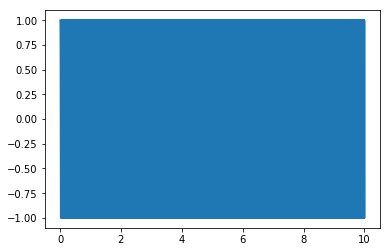

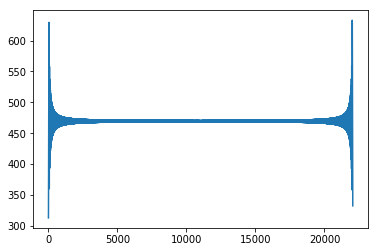

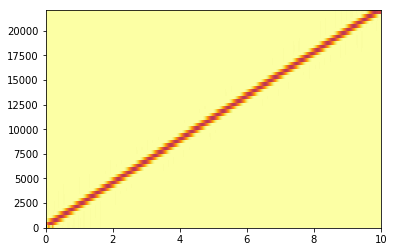

In [2]:
signal = thinkdsp.Chirp(start = 1, end = 22050, amp = 1.0)
wave = signal.make_wave(duration = 10, framerate = 44100)
wave.plot()
spectrum = wave.make_spectrum()
plt.figure()
spectrum.plot()
plt.figure()
spectrogram = wave.make_spectrogram(seg_length = 128)
spectrogram.plot()

In [3]:
wave.make_audio()

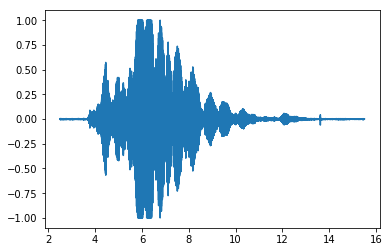

In [4]:
recv = thinkdsp.read_wave('Chirp.wav').segment(start = 2.5, duration = 13)
recv.plot()

In [5]:
corr = np.correlate(recv.ys, wave.ys, 'valid')
start = np.argmax(corr)
start

49319

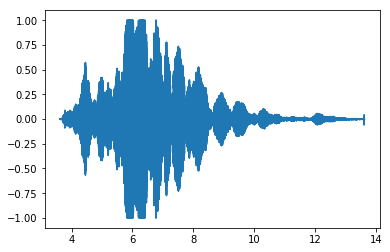

In [6]:
recv_seg = recv.segment(start = 2.5+(start-50)/44100, duration = 10.01)
recv_seg.plot()

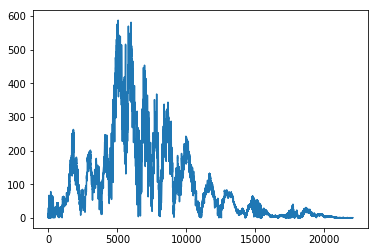

In [7]:
recv_seg_spec = recv_seg.make_spectrum()
recv_seg_spec.plot()

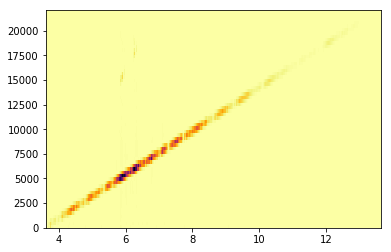

In [8]:
recv_seg_specgram = recv_seg.make_spectrogram(seg_length = 128)
recv_seg_specgram.plot()

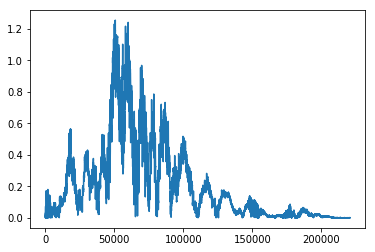

In [9]:
H = np.fft.rfft(recv_seg.ys)/np.fft.rfft(wave.ys, len(recv_seg.ys))
plt.plot(np.abs(H))

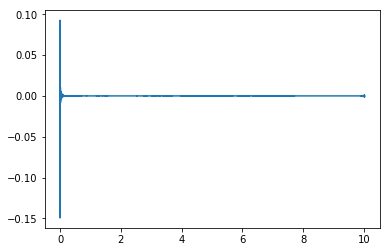

In [66]:
cir = np.fft.ifft(np.fft.fft(recv_seg.ys)/np.fft.fft(wave.ys, len(recv_seg.ys)))
x = np.linspace(0, len(cir)/44100, len(cir))
plt.plot(x,cir)

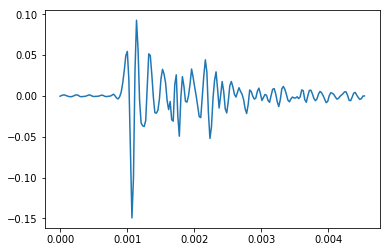

In [67]:
x = np.linspace(0, len(cir[:200])/44100, len(cir[:200]))
plt.plot(x,cir[:200])

Measure the effect of distance on SNR and channel estimation

1. The distance between the speaker and the microphone is 20cm

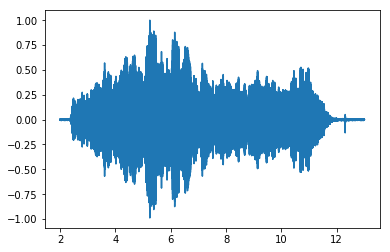

In [30]:
recv_20 = thinkdsp.read_wave('Chirp_20cm.wav').segment(start = 2, duration = 11)
recv_20.plot()

In [31]:
corr = np.correlate(recv_20.ys, wave.ys, 'valid')
start = np.argmax(corr)
start

13484

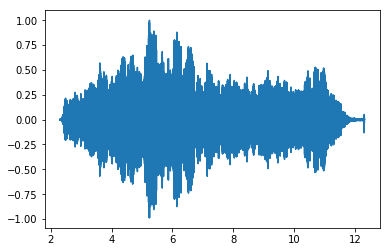

In [32]:
recv_20_seg = recv_20.segment(start = 2+(start-50)/44100, duration = 10.01)
recv_20_seg.plot()

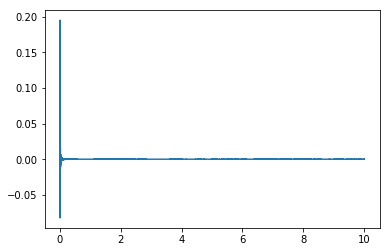

In [37]:
H_20 = np.fft.fft(recv_20_seg.ys)/np.fft.fft(wave.ys, len(recv_20_seg.ys))
cir_20 = np.fft.ifft(H_20)
x = np.linspace(0, len(cir)/44100, len(cir_20))
plt.plot(x,cir_20)

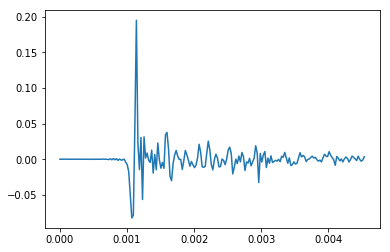

In [38]:
x = np.linspace(0, len(cir_20[:200])/44100, len(cir_20[:200]))
plt.plot(x,cir_20[:200])

2. The distance between the speaker and the microphone is 40cm

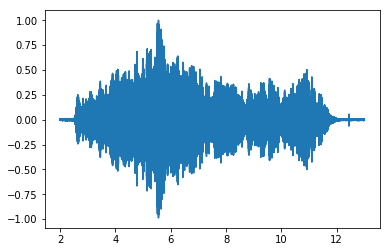

In [36]:
recv_40 = thinkdsp.read_wave('Chirp_40cm.wav').segment(start = 2, duration = 11)
recv_40.plot()

In [39]:
corr = np.correlate(recv_40.ys, wave.ys, 'valid')
start = np.argmax(corr)
start

19479

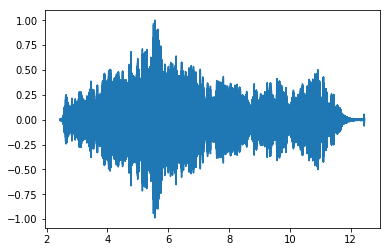

In [40]:
recv_40_seg = recv_40.segment(start = 2+(start-50)/44100, duration = 10.01)
recv_40_seg.plot()

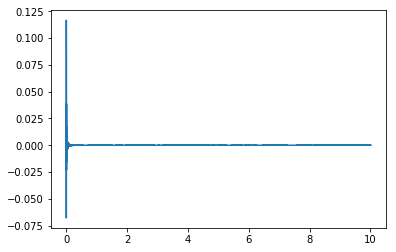

In [41]:
H_40 = np.fft.fft(recv_40_seg.ys)/np.fft.fft(wave.ys, len(recv_40_seg.ys))
cir_40 = np.fft.ifft(H_40)
x = np.linspace(0, len(cir_40)/44100, len(cir_40))
plt.plot(x,cir_40)

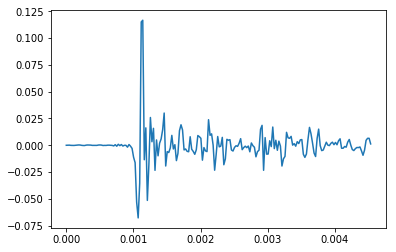

In [42]:
x = np.linspace(0, len(cir_40[:200])/44100, len(cir_40[:200]))
plt.plot(x,cir_40[:200])

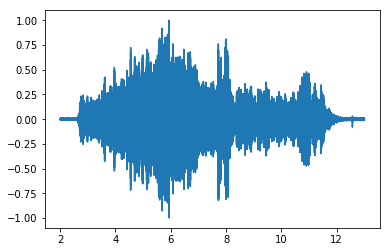

In [43]:
recv_60 = thinkdsp.read_wave('Chirp_60cm.wav').segment(start = 2, duration = 11)
recv_60.plot()

In [44]:
corr = np.correlate(recv_60.ys, wave.ys, 'valid')
start = np.argmax(corr)
start

24989

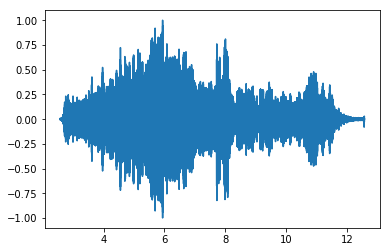

In [45]:
recv_60_seg = recv_60.segment(start = 2+(start-50)/44100, duration = 10.01)
recv_60_seg.plot()

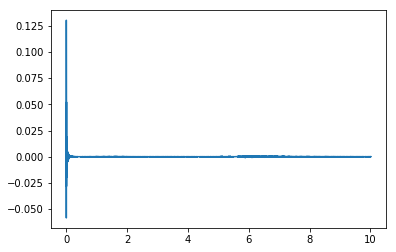

In [46]:
H_60 = np.fft.fft(recv_60_seg.ys)/np.fft.fft(wave.ys, len(recv_60_seg.ys))
cir_60 = np.fft.ifft(H_60)
x = np.linspace(0, len(cir_60)/44100, len(cir_60))
plt.plot(x,cir_60)

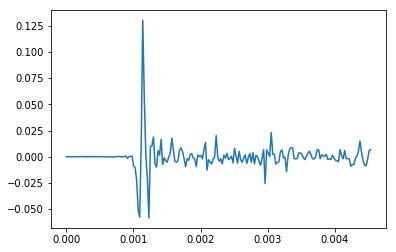

In [47]:
x = np.linspace(0, len(cir_60[:200])/44100, len(cir_60[:200]))
plt.plot(x,cir_60[:200])

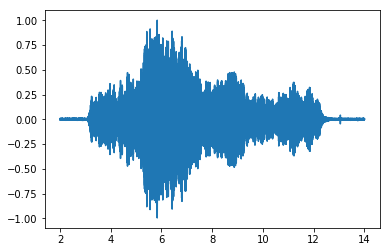

In [50]:
recv_80 = thinkdsp.read_wave('Chirp_80cm.wav').segment(start = 2, duration = 12)
recv_80.plot()

In [51]:
corr = np.correlate(recv_80.ys, wave.ys, 'valid')
start = np.argmax(corr)
start

46366

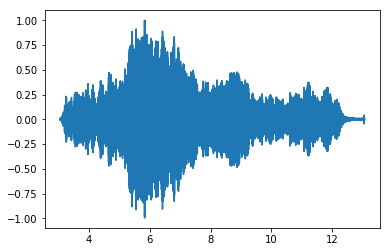

In [52]:
recv_80_seg = recv_80.segment(start = 2+(start-50)/44100, duration = 10.01)
recv_80_seg.plot()

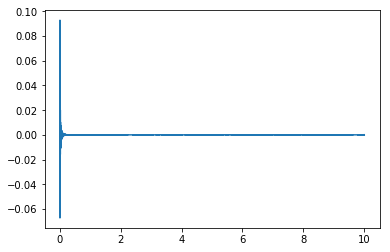

In [53]:
H_80 = np.fft.fft(recv_80_seg.ys)/np.fft.fft(wave.ys, len(recv_80_seg.ys))
cir_80 = np.fft.ifft(H_80)
x = np.linspace(0, len(cir_80)/44100, len(cir_80))
plt.plot(x,cir_80)

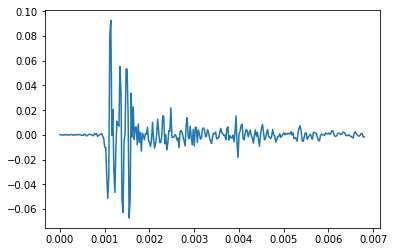

In [55]:
x = np.linspace(0, len(cir_80[:300])/44100, len(cir_80[:300]))
plt.plot(x,cir_80[:300])

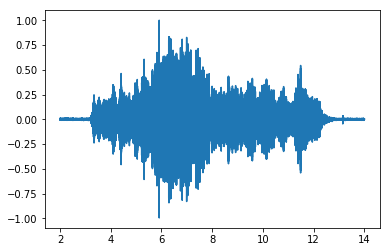

In [57]:
recv_100 = thinkdsp.read_wave('Chirp_100cm.wav').segment(start = 2, duration = 12)
recv_100.plot()

In [58]:
corr = np.correlate(recv_100.ys, wave.ys, 'valid')
start = np.argmax(corr)
start

50595

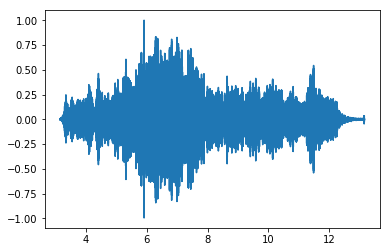

In [59]:
recv_100_seg = recv_100.segment(start = 2+(start-50)/44100, duration = 10.01)
recv_100_seg.plot()

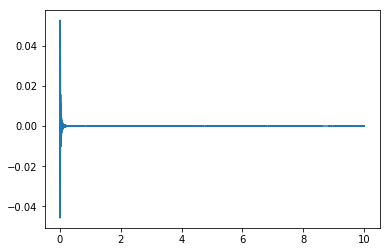

In [60]:
H_100 = np.fft.fft(recv_100_seg.ys)/np.fft.fft(wave.ys, len(recv_100_seg.ys))
cir_100 = np.fft.ifft(H_100)
x = np.linspace(0, len(cir_100)/44100, len(cir_100))
plt.plot(x,cir_100)

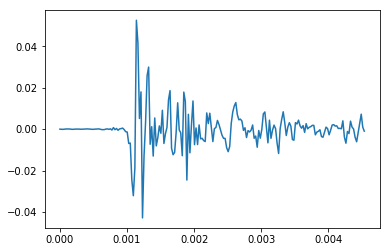

In [61]:
x = np.linspace(0, len(cir_100[:200])/44100, len(cir_100[:200]))
plt.plot(x,cir_100[:200])

Text(0.5,1,'100 cm')

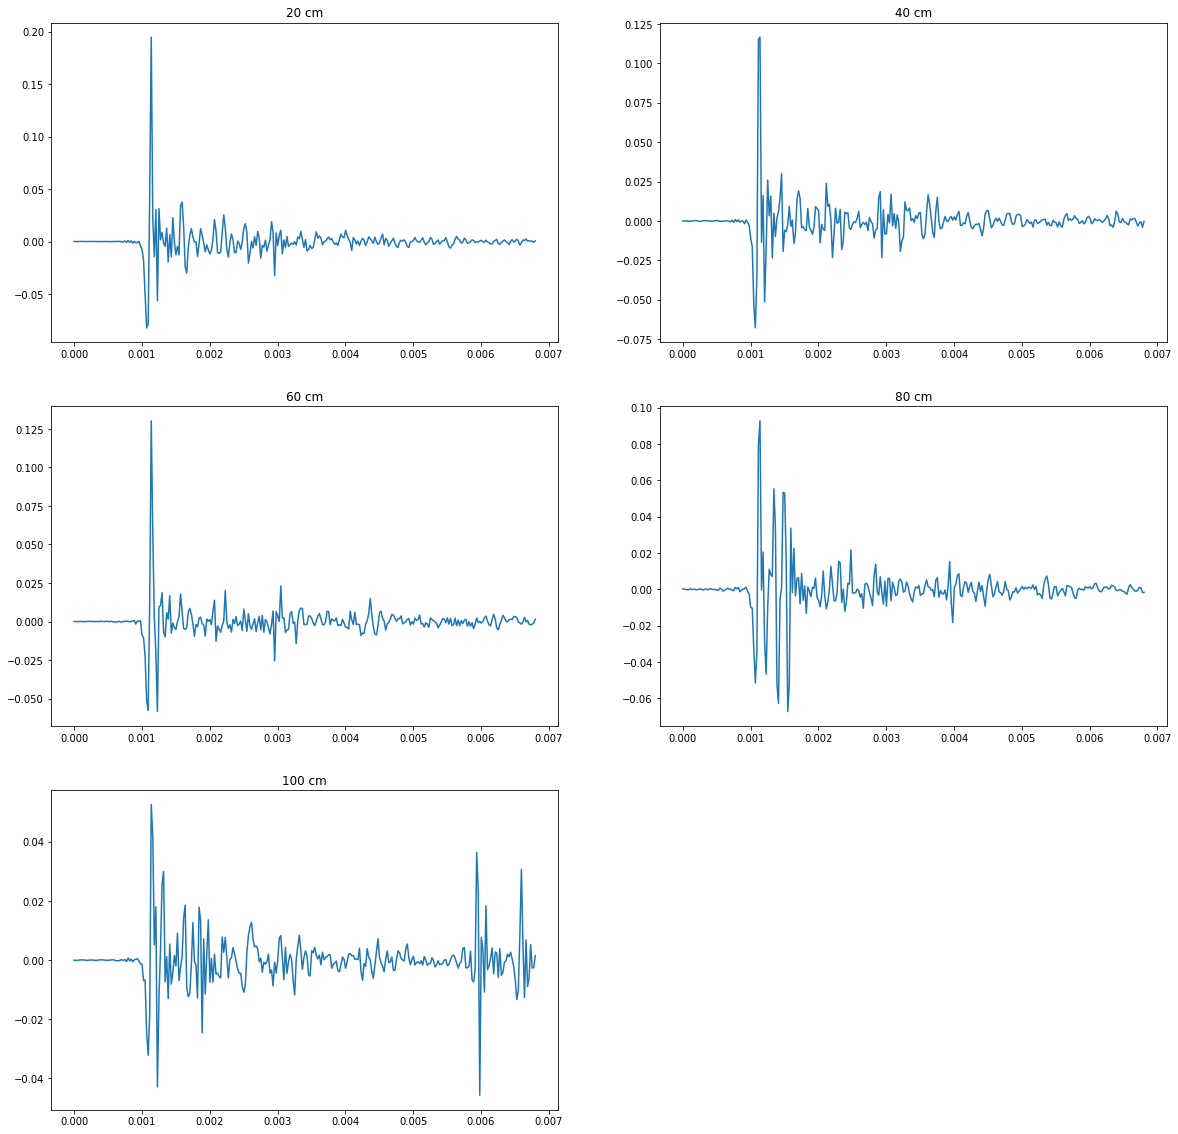

In [68]:
plt.figure(figsize = (20,20))
plt.subplot(321)
x = np.linspace(0, len(cir_20[:300])/44100, len(cir_20[:300]))
plt.plot(x,cir_20[:300])
plt.title('20 cm')
plt.subplot(322)
x = np.linspace(0, len(cir_40[:300])/44100, len(cir_40[:300]))
plt.plot(x,cir_40[:300])
plt.title('40 cm')
plt.subplot(323)
x = np.linspace(0, len(cir_60[:300])/44100, len(cir_60[:300]))
plt.plot(x,cir_60[:300])
plt.title('60 cm')
plt.subplot(324)
x = np.linspace(0, len(cir_80[:300])/44100, len(cir_80[:300]))
plt.plot(x,cir_80[:300])
plt.title('80 cm')
plt.subplot(325)
x = np.linspace(0, len(cir_100[:300])/44100, len(cir_100[:300]))
plt.plot(x,cir_100[:300])
plt.title('100 cm')